# LAB 04.02 - Buiding Datasets

In [4]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

replicating local resources


'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [5]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, session_id='2025.2', course_id=init.course_id, lab_id="L04.02", varname="student");

logging in as santiago.herrera6@udea.edu.co... please wait
you are registered in the following sessions of this course

     ['2025.2', 'open']

and you have explicitly requested session '2025.2'.
your grades will be reported in that session

-------------
using course session ai4eng.v1.udea.r3::2025.2
success!! you are logged in
-------------


## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: [https://www.kaggle.com/c/ashrae-energy-prediction](https://www.kaggle.com/c/ashrae-energy-prediction), register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**:
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [ ]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print ("id:", bid)
print ("date:", date)

id: 990
date: 2016-02-08


In [16]:
import pandas as pd
import os

os.environ['KAGGLE_CONFIG_DIR']="."
!kaggle competitions download -c ashrae-energy-prediction -f building_metadata.csv
!kaggle competitions download -c ashrae-energy-prediction -f weather_train.csv
!kaggle competitions download -c ashrae-energy-prediction -f train.csv

  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 161MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 717MB/s]
  0% 0.00/120M [00:00<?, ?B/s]
100% 120M/120M [00:00<00:00, 1.46GB/s]


In [17]:
!unzip train.csv
!unzip weather_train.csv

Archive:  train.csv
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Archive:  weather_train.csv
replace weather_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: weather_train.csv       


In [18]:
train=pd.read_csv("train.csv")
weather=pd.read_csv("weather_train.csv")
building=pd.read_csv("building_metadata.csv")
print('Dataset Train:')
train.head()


Dataset Train:


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [ ]:
train['timestamp'].info()
t = train[(train.building_id == bid) & (train.meter == 0)].fillna(0)
t['timestamp'] = pd.to_datetime(t['timestamp'])
t['timestamp'].info()
t.head()

<class 'pandas.core.series.Series'>
RangeIndex: 20216100 entries, 0 to 20216099
Series name: timestamp
Non-Null Count     Dtype 
--------------     ----- 
20216100 non-null  object
dtypes: object(1)
memory usage: 154.2+ MB
<class 'pandas.core.series.Series'>
Index: 8778 entries, 1352 to 20215137
Series name: timestamp
Non-Null Count  Dtype         
--------------  -----         
8778 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.2 KB


,building_id,meter,timestamp,meter_reading
1352,990,0,2016-01-01 00:00:00,0.0
3648,990,0,2016-01-01 01:00:00,49.0
5944,990,0,2016-01-01 02:00:00,48.0
8242,990,0,2016-01-01 03:00:00,50.0
10537,990,0,2016-01-01 04:00:00,48.0


In [ ]:
print('Dataset Building:')
building.head()

Dataset Building:


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [ ]:
b = building[(building.building_id == bid)].fillna(0)
b

,site_id,building_id,primary_use,square_feet,year_built,floor_count
990,9,990,Office,82939,0.0,0.0


In [26]:
print('Dataset Weather:')
weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather[weather.site_id == 3]
#weather.head()


Dataset Weather:


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
26330,3,2016-01-01 00:00:00,10.0,8.0,2.2,NaN,1021.1,350.0,4.1
26331,3,2016-01-01 01:00:00,9.4,NaN,2.8,0.0,1021.5,350.0,6.2
26332,3,2016-01-01 02:00:00,8.9,NaN,2.2,0.0,1021.7,10.0,4.6
26333,3,2016-01-01 03:00:00,7.8,8.0,1.1,0.0,1021.7,350.0,7.7
26334,3,2016-01-01 04:00:00,7.8,NaN,0.6,0.0,1021.8,340.0,4.1
...,...,...,...,...,...,...,...,...,...
35105,3,2016-12-31 19:00:00,9.4,NaN,-6.7,0.0,1016.7,200.0,11.8
35106,3,2016-12-31 20:00:00,8.9,NaN,-6.1,0.0,1016.3,200.0,8.2
35107,3,2016-12-31 21:00:00,8.9,6.0,-6.1,0.0,1015.4,190.0,7.7
35108,3,2016-12-31 22:00:00,8.9,NaN,-6.1,0.0,1015.7,200.0,8.2


In [25]:
w = weather[weather.site_id == b.site_id.values[0]].fillna(0)
w.head()

NameError: name 'b' is not defined

In [ ]:
print(f"Filas en b: {len(b)}")
print(f"Filas en t: {len(t)}")
print(f"Filas en w: {len(w)}")

Filas en b: 1
Filas en t: 8778
Filas en w: 8780


In [ ]:
df = pd.DataFrame(columns=[
    'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
    'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
    'wind_direction', 'wind_speed', 'square_feet', 'year_built'])
t_filtered = t[
    (t['meter_reading'] == t.meter_reading) &
    (t['meter'] == 0) &
    (t['timestamp'].dt.date == pd.to_datetime(date).date())].copy()

df = t_filtered.merge(
    b[['building_id', 'site_id', 'square_feet', 'year_built']],
    on='building_id',
    how='left')
df = df.merge(
    w[['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed']],
    on=['site_id', 'timestamp'],
    how='left')
df = df.fillna(0)
df = df.drop(['timestamp','meter','building_id'],axis=1)

print(f"\n{'='*50}")
print(f"Dataset final: {len(df)} filas × {len(df.columns)} columnas")
print(f"{'='*50}")
print(df.head())



Dataset final: 24 filas × 11 columnas
   meter_reading  site_id  square_feet  year_built  air_temperature  \
0           62.0        9        82939         0.0             16.7   
1           64.0        9        82939         0.0             15.0   
2           50.0        9        82939         0.0             13.9   
3           51.0        9        82939         0.0             11.7   
4           52.0        9        82939         0.0             10.6   

   cloud_coverage  dew_temperature  precip_depth_1_hr  sea_level_pressure  \
0             0.0              0.0                0.0              1020.1   
1             0.0              0.0                0.0              1020.4   
2             0.0              0.0                0.0              1020.9   
3             0.0              0.0                0.0              1021.3   
4             0.0              0.0                0.0              1021.1   

   wind_direction  wind_speed  
0             0.0         2.6  
1      

In [ ]:

df.head()


,meter_reading,site_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,62.0,9,82939,0.0,16.7,0.0,0.0,0.0,1020.1,0.0,2.6
1,64.0,9,82939,0.0,15.0,0.0,0.0,0.0,1020.4,180.0,2.1
2,50.0,9,82939,0.0,13.9,0.0,0.0,0.0,1020.9,210.0,1.5
3,51.0,9,82939,0.0,11.7,0.0,0.0,0.0,1021.3,220.0,1.5
4,52.0,9,82939,0.0,10.6,0.0,0.0,0.0,1021.1,0.0,0.0


#### provide your answer here, drop the decimals

In [ ]:

# target variable sum
sumY =int(df['meter_reading'].sum())

# input variables sum
sumX =int(df.sum().sum() - sumY)

sumX, sumY

(2020393, 2414)

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

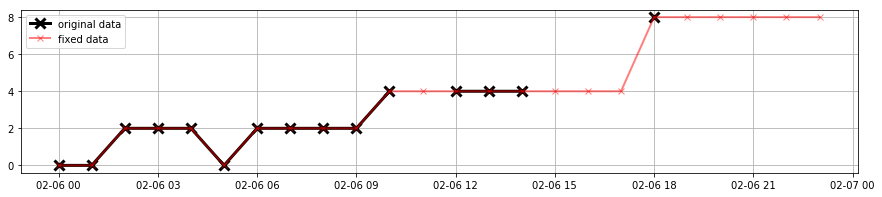

In [ ]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [6]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-08


#### fill in your fixed time series

¿La fecha 2016-02-08 y site_id 3 existen? True
[8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8]


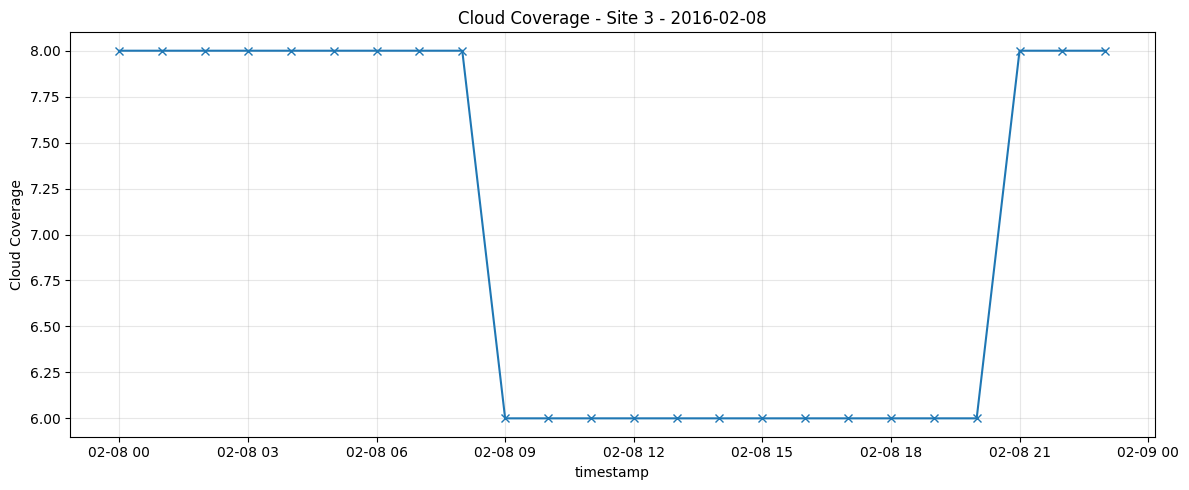

In [30]:
# for instance
# fixed_ts = [6,6,6,4,4,5,6,7,7,7,6,6,6,5,4,3,2,2,1,1,1,2,3,4]
existe = ((weather['timestamp'].dt.date == pd.to_datetime(date).date())&(weather['site_id'] == 3)).any()
print(f"¿La fecha {date} y site_id 3 existen? {existe}")
w_cc = weather[(weather['site_id'] == 3)&(weather['timestamp'].dt.date == pd.to_datetime(date).date())].copy().sort_values('timestamp')
w_cc['cloud_coverage'] = w_cc['cloud_coverage'].ffill()
fixed_ts = w_cc['cloud_coverage'].astype(int).values.tolist()
print(fixed_ts)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(w_cc['timestamp'],w_cc['cloud_coverage'], marker='x')
plt.title(f'Cloud Coverage - Site {3} - {date}')
plt.xlabel('timestamp')
plt.ylabel('Cloud Coverage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24]


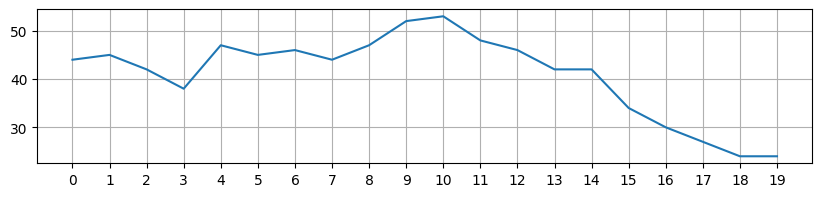

In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts)


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24],
     [[30, 27, 24], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series.

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (21,3) and y dimensions will be (21)

Again, use any tool of your choice to generate your result.

In [29]:
w_3 = weather[(weather['site_id'] == 3)&(weather['timestamp'].dt.date == pd.to_datetime(date).date())].copy().sort_values('timestamp')
w_3

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
27242,3,2016-02-08 00:00:00,5.6,8.0,-5.6,0.0,1014.6,30.0,3.6
27243,3,2016-02-08 01:00:00,5.6,NaN,-5.6,0.0,1014.4,30.0,4.1
27244,3,2016-02-08 02:00:00,5.0,NaN,-5.0,0.0,1013.3,360.0,5.7
27245,3,2016-02-08 03:00:00,3.9,8.0,-4.4,0.0,1012.9,360.0,4.1
27246,3,2016-02-08 04:00:00,4.4,NaN,-4.4,0.0,1011.9,20.0,4.6
27247,3,2016-02-08 05:00:00,4.4,NaN,-4.4,0.0,1011.1,360.0,4.6
27248,3,2016-02-08 06:00:00,3.3,8.0,-4.4,0.0,1010.2,340.0,4.6
27249,3,2016-02-08 07:00:00,3.3,NaN,-5.0,0.0,1009.0,340.0,5.7
27250,3,2016-02-08 08:00:00,2.8,NaN,-5.6,0.0,1008.1,340.0,5.7
27251,3,2016-02-08 09:00:00,2.2,6.0,-5.6,0.0,1007.8,340.0,4.6


In [31]:
# Parámetros
n = 3

# Verificar la longitud de fixed_ts
if len(fixed_ts) < n + 1:
    print(f"No hay suficientes datos para construir X e y. Se requieren al menos {n + 1} valores.")
else:
    # Crear matrices X e y
    X = np.zeros((len(fixed_ts) - n, 3), dtype=int)
    y = np.array(fixed_ts[n:])  # Se excluyen los n primeros valores

    for i in range(len(fixed_ts) - n):
        X[i] = fixed_ts[i:i+n]  # Rellenar la matriz X con ventanas de tamaño n

    # Mostrar los resultados en la consola
    print("X = [")
    for row in X:
        print(f"  {row.tolist()},")
    print("]")

    print("\ny = [", end="")
    print(", ".join(map(str, y)), end="")
    print("]")

    # Verificar dimensiones
    print("\nDimensiones de X:", X.shape)
    print("Dimensiones de y:", y.shape)



X = [
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 6],
  [8, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 8],
  [6, 8, 8],
]

y = [8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8]

Dimensiones de X: (21, 3)
Dimensiones de y: (21,)


#### fill in your answer


In [32]:
X = [
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 8],
  [8, 8, 6],
  [8, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 6],
  [6, 6, 8],
  [6, 8, 8],
  ]

y = [8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8]

**submit your answer**

In [33]:
student.submit_task(globals(), task_id="task_03");